In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster 

In [90]:
# Importar archivo para trabajar
df_fran = pd.read_csv('/Users/benjaminzelaya/Desktop/PGF/PG/PF_DS_REVIEWS_AND_RECOMMENDATIONS/sprint_2/datasets_limpios/Franquicias_Inversion.csv')

In [70]:
df_fran

,Id_Franquicia,Nombre_Franquicia,Min_Inversion,Max_Inversion,Año_Fundado,Unidades
0,1,Subway,190000.0,522000.0,1967,20576
1,2,McDonald's,521000.0,2500000.0,1955,13455
2,3,Dunkin',121000.0,1810000.0,1954,8118
3,4,Taco Bell Traditional,576000.0,3370000.0,1962,7513
4,5,Burger King,232000.0,4520000.0,1954,7043
...,...,...,...,...,...,...
934,935,Dazbog Coffee,187000.0,397000.0,1996,0
935,936,Vino 100,65000.0,431000.0,2003,0
936,937,Deli Zone,270000.0,437000.0,2010,0
937,938,O'Charley's,2100000.0,3140000.0,1971,0


In [71]:
df_fran.shape

(939, 6)

In [72]:
df_fran.duplicated().sum()

0

In [73]:
df_fran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id_Franquicia      939 non-null    int64  
 1   Nombre_Franquicia  939 non-null    object 
 2   Min_Inversion      939 non-null    float64
 3   Max_Inversion      939 non-null    float64
 4   Año_Fundado        939 non-null    int64  
 5   Unidades           939 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 44.1+ KB


In [74]:
#proporciona una descripción rápida y útil de las estadísticas de la columna Max_Inversion	
df_fran['Max_Inversion'].describe()

count    9.390000e+02
mean     4.640620e+06
std      4.858272e+07
min      4.100000e+04
25%      4.570000e+05
50%      6.970000e+05
75%      1.320000e+06
max      9.776000e+08
Name: Max_Inversion, dtype: float64

In [75]:
#proporciona una descripción rápida y útil de las estadísticas de la columna Unidades	
df_fran['Unidades'].describe()

count      939.000000
mean       235.374867
std       1069.648008
min          0.000000
25%          7.000000
50%         23.000000
75%         86.000000
max      20576.000000
Name: Unidades, dtype: float64

In [76]:
#verificamos los valores unicos en la columna Nombre_Franquicia

df_fran['Nombre_Franquicia'].unique()

array(['Subway', "McDonald's", "Dunkin'", 'Taco Bell Traditional',
       'Burger King', 'Dominos', 'Bimbo Bakeries', 'Wendys',
       'Pizza Hut Traditional', 'Advanced Fresh Concepts',
       'Little Caesar', 'KFC Traditional', 'Sonic Drive-In', "Arby's",
       "Papa John's", 'Popeyes Louisiana Kitchen',
       "Noble Roman's Craft Pizza & Pub", "Jimmy John's",
       'Chick Fil A (Franchise Program)', "Jersey Mike's",
       'Panda Express', 'Jack In The Box',
       'Hissho Sushi/Oumi Sushi/Sushi with Gusto', 'Panera Bread',
       'DQ Grill & Chill', "Hardee's", 'Wingstop', 'IHOP', "Applebee's",
       'Kona Ice', 'Five Guys', "Denny's", 'Snowfox',
       'Pizza Hut Non-Traditional', "Chili's", 'Tropical Smoothie Cafe',
       'Buffalo Wild Wings', 'FIREHOUSE SUBS', "Papa Murphy's",
       "Auntie Anne's", "Carl's Jr.", 'Smoothie King', "Chester's",
       "Marco's Pizza", 'Baskin-Robbins', 'Cinnabon', "Church's Chicken",
       "Zaxby's", 'Cold Stone Creamery', 'Orion Food Syste

# ANALISIS EXPLORATORIO DE ESTADISTICAS DESCRIPTIVAS

In [77]:
# Calcular estadísticas descriptivas para columnas numéricas
descripcion_estadistica = df_fran.describe()

# Mostrar el resumen de estadísticas descriptivas
print(descripcion_estadistica)


       Id_Franquicia  Min_Inversion  Max_Inversion  Año_Fundado      Unidades
count     939.000000   9.390000e+02   9.390000e+02   939.000000    939.000000
mean      470.000000   2.208883e+06   4.640620e+06  2002.919063    235.374867
std       271.210251   2.461830e+07   4.858272e+07    18.373751   1069.648008
min         1.000000   3.000000e+03   4.100000e+04  1926.000000      0.000000
25%       235.500000   1.695000e+05   4.570000e+05  1995.000000      7.000000
50%       470.000000   2.890000e+05   6.970000e+05  2010.000000     23.000000
75%       704.500000   5.120000e+05   1.320000e+06  2016.000000     86.000000
max       939.000000   4.695000e+08   9.776000e+08  2023.000000  20576.000000


### Estas estadísticas descriptivas para las columnas numéricas en el conjunto de datos muestra lo siguiente:

Para la columna "Id_Franquicia", hay un total de 939 registros con valores que van desde 1 hasta 939.

La columna "Min_Inversion" tiene una inversión mínima de $3,000 y una inversión máxima de $469.5 millones, con una media de aproximadamente $2.21 millones y una desviación estándar de alrededor de $24.62 millones.

La columna "Max_Inversion" muestra una inversión máxima de $977.6 millones, con una inversión mínima de $41,000. La inversión promedio es de aproximadamente $4.64 millones, con una desviación estándar de alrededor de $48.58 millones.

En cuanto al año de fundación en la columna "Año_Fundado", el valor mínimo es 1926 y el máximo es 2023. La media es de aproximadamente 2002.92, con una desviación estándar de alrededor de 18.37 años.

Finalmente, la columna "Unidades" muestra el número de unidades que varía desde 0 hasta 20,576, con una media de aproximadamente 235.37 y una desviación estándar de alrededor de 1,069.65.

Estos estadísticas nos proporcionan una visión general de la distribución de los valores en estas columnas y pueden ser útiles para comprender mejor el conjunto de datos y tomar decisiones informadas en análisis posteriores.

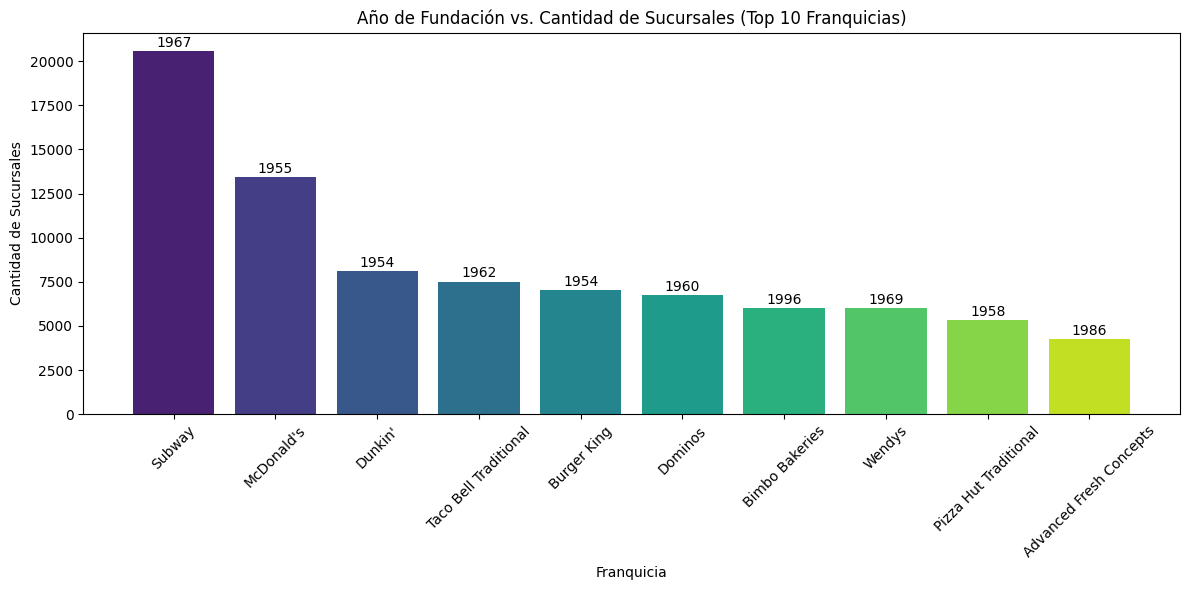

In [85]:

# Obtener las 20 franquicias con más unidades
top_10_franquicias = df_fran.nlargest(10, 'Unidades')

# Crear una paleta de colores basada en el año de fundación
colores = sns.color_palette("viridis", len(top_10_franquicias))

# Crear el gráfico de barras con colores de la paleta
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_franquicias['Nombre_Franquicia'], top_10_franquicias['Unidades'], color=colores)

# Agregar etiquetas de texto con el año de fundación en cada barra
for bar, year in zip(bars, top_10_franquicias['Año_Fundado']):
    height = bar.get_height()
    plt.annotate(f'{year}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Ajustar la posición vertical del texto
                 textcoords="offset points",
                 ha='center', fontsize=10, color='black')

# Personalizar el diseño del gráfico
plt.title('Año de Fundación vs. Cantidad de Sucursales (Top 10 Franquicias)')
plt.xlabel('Franquicia')
plt.ylabel('Cantidad de Sucursales')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Al analizar el gráfico que compara el año de fundación con la cantidad de sucursales de las 10 franquicias más grandes, se pueden extraer varias conclusiones significativas:

En primer lugar, se destaca que no existe una correlación lineal clara entre la antigüedad de una franquicia y su expansión. Aunque franquicias más antiguas muestran una presencia sólida en términos de sucursales, franquicias relativamente nuevas también ocupan posiciones destacadas. Este hecho sugiere que el éxito en la expansión de una franquicia no está determinado únicamente por su antigüedad, sino que factores como la estrategia de negocio, la demanda del mercado y la gestión eficiente pueden desempeñar roles fundamentales. 

Además, el gráfico refleja la diversidad en la distribución de franquicias, con algunas de larga data que siguen liderando y otras más recientes que han logrado un crecimiento rápido. En resumen, el gráfico ilustra que el mundo de las franquicias es complejo y que tanto la experiencia como la innovación pueden ser igualmente exitosas en el logro de una expansión significativa.

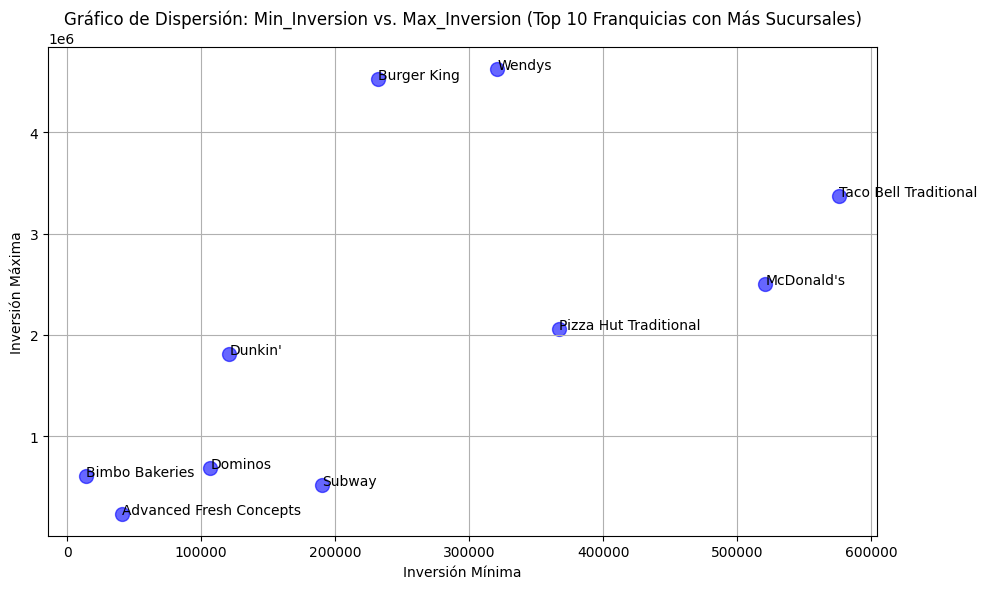

In [86]:


# Filtrar las franquicias con más unidades (por ejemplo, las 10 franquicias con más unidades)
top_franquicias = df_fran.nlargest(10, 'Unidades')

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(top_franquicias['Min_Inversion'], top_franquicias['Max_Inversion'], s=100, alpha=0.6, c='blue')

# Agregar etiquetas de texto con el nombre de la franquicia en cada punto
for i, nombre in enumerate(top_franquicias['Nombre_Franquicia']):
    plt.annotate(nombre, (top_franquicias['Min_Inversion'].iloc[i], top_franquicias['Max_Inversion'].iloc[i]), fontsize=10)

# Personalizar el diseño del gráfico
plt.title('Gráfico de Dispersión: Min_Inversion vs. Max_Inversion (Top 10 Franquicias con Más Sucursales)')
plt.xlabel('Inversión Mínima')
plt.ylabel('Inversión Máxima')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


Este gráfico de dispersión  representa una visualización  de las inversiones mínimas y máximas requeridas para las diez franquicias con más sucursales. Cada punto en el gráfico representa una franquicia específica. Esta representación visual permite identificar patrones y tendencias en las inversiones requeridas, lo que podría ser crucial para tomar decisiones estratégicas en el ámbito de las franquicias. A primera vista, parece no haber una correlación lineal clara entre las inversiones mínimas y máximas, lo que sugiere que factores adicionales pueden influir en estas cifras. Esta herramienta interactiva brinda una forma eficaz de explorar y analizar las relaciones financieras dentro de las franquicias con mayor presencia en el mercado.

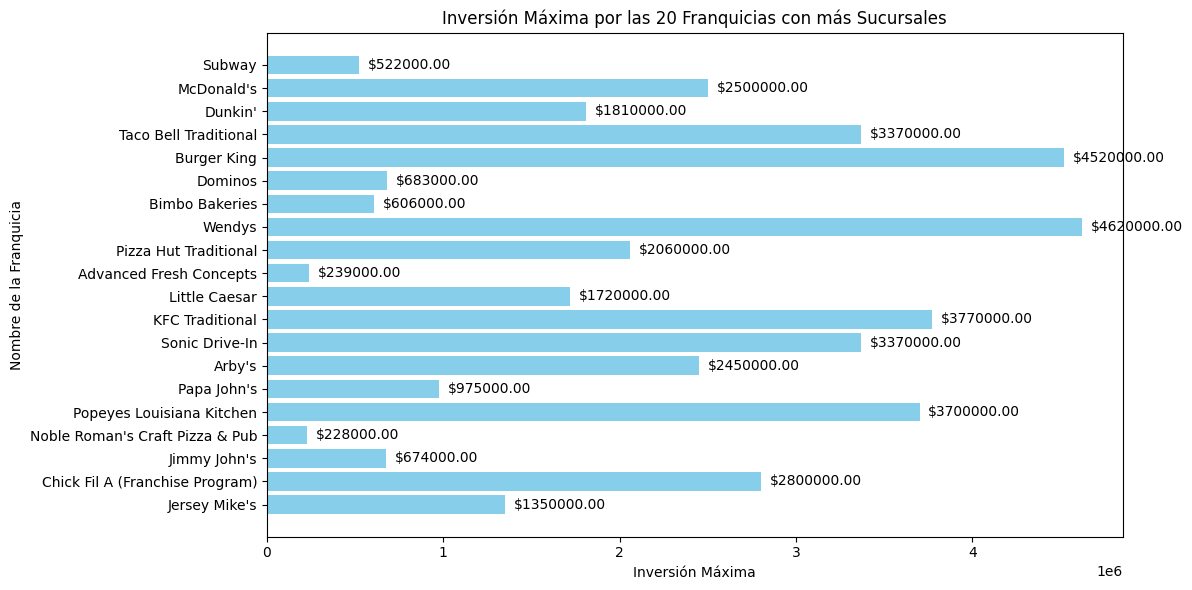

In [87]:
# Obtener las 20 franquicias con más unidades
top_10_franquicias = df_fran.nlargest(20, 'Unidades')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_10_franquicias['Nombre_Franquicia'], top_10_franquicias['Max_Inversion'], color='skyblue')
plt.xlabel('Inversión Máxima')
plt.ylabel('Nombre de la Franquicia')
plt.title('Inversión Máxima por las 20 Franquicias con más Sucursales')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la franquicia con la mayor inversión en la parte superior

# Agregar etiquetas con los valores exactos encima de las barras
for i, inversion in enumerate(top_10_franquicias['Max_Inversion']):
    plt.text(inversion + 50000, i, f'${inversion:.2f}', va='center', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



En este gráfico de barras que representa las inversiones máximas requeridas por las 20 franquicias con mayor cantidad de unidades ofrece una visión reveladora de la diversidad en el panorama de inversión de franquicias en Estados Unidos. Observamos que estas franquicias líderes reflejan la amplitud de oportunidades disponibles para los inversores. Una tendencia interesante es que muchas de estas franquicias ofrecen inversiones relativamente asequibles en comparación con otras opciones en el mercado de franquicias. Esta accesibilidad en términos de inversión ha contribuido a su crecimiento en términos de unidades y, en última instancia, a su éxito continuo. Por otro lado, también resalta la presencia de franquicias más grandes y establecidas que requieren inversiones más significativas. Esto proporciona una visión valiosa para nuestros clientes - inversores que buscan oportunidades dentro de su presupuesto como para aquellos que desean considerar opciones de inversión de mayor envergadura en el competitivo mundo de las franquicia

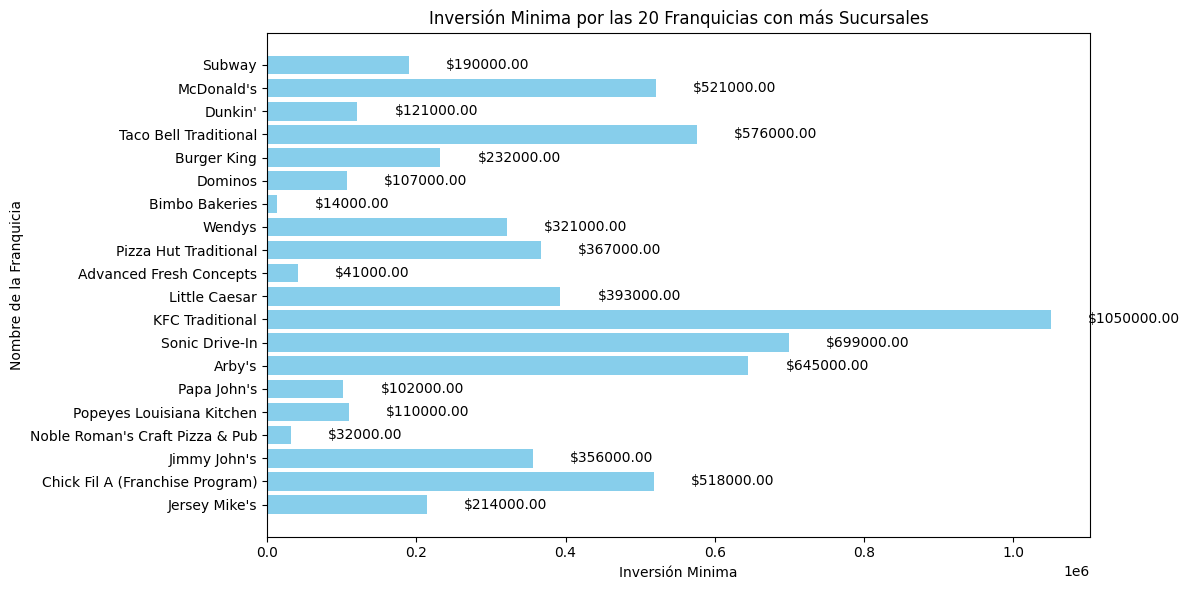

In [88]:
# Obtener las 20 franquicias con más unidades
top_10_franquicias = df_fran.nlargest(20, 'Unidades')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(top_10_franquicias['Nombre_Franquicia'], top_10_franquicias['Min_Inversion'], color='skyblue')
plt.xlabel('Inversión Minima')
plt.ylabel('Nombre de la Franquicia')
plt.title('Inversión Minima por las 20 Franquicias con más Sucursales')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la franquicia con la mayor inversión en la parte superior

# Agregar etiquetas con los valores exactos encima de las barras
for i, inversion in enumerate(top_10_franquicias['Min_Inversion']):
    plt.text(inversion + 50000, i, f'${inversion:.2f}', va='center', fontsize=10, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Este Grafo  exhibe las inversiones mínimas necesarias para las 20 franquicias con mayor número de sucursales ofrece un intrigante panorama de la inversión en el ámbito de las franquicias en Estados Unidos. Este gráfico pone de manifiesto la sorprendente diversidad de opciones de inversión disponibles. Desde franquicias que requieren inversiones mínimas muy accesibles hasta aquellas que exigen inversiones más sustanciales, el espectro es amplio y variado. Lo que resulta especialmente intrigante es que algunas de las franquicias más grandes en términos de cantidad de sucursales son accesibles para inversores con presupuestos más modestos, lo que democratiza el acceso a este mercado. Por otro lado, la presencia de franquicias con inversiones mínimas más elevadas sugiere oportunidades para nuestros clientes inversionistas que buscan realizar inversiones más robustas y sostenibles. Para finalizar, este gráfico brinda una valiosa perspectiva que resalta la diversidad de opciones para inversores en el dinámico sector de las franquicias.

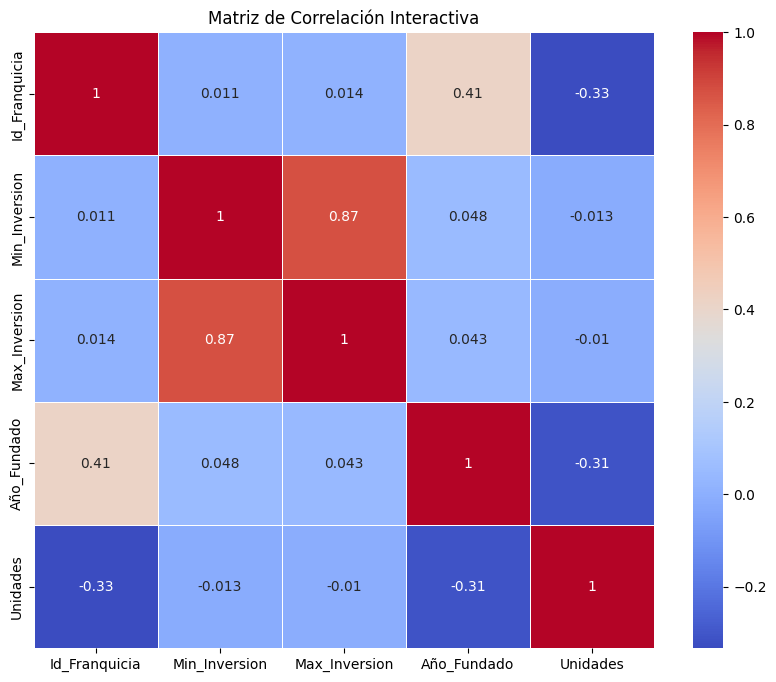

In [89]:

# Calcular la matriz de correlación
correlation_matrix = df_fran.corr()

# Crear el mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación Interactiva')
plt.show()


El mapa de calor de correlación entre variables numéricas proporciona una visión completa de las relaciones y dependencias entre las diversas variables de interés en el conjunto de datos de franquicias. Cada celda en el mapa de calor representa la correlación entre dos variables, y el rango de colores indica la fuerza y dirección de esa correlación.

Algunos hallazgos destacados incluyen una correlación positiva significativa entre la inversión mínima y máxima requerida para abrir una franquicia, lo que sugiere que a medida que aumenta la inversión mínima, también lo hace la inversión máxima. Además, se observa una correlación negativa entre el año de fundación y la inversión máxima, lo que podría indicar que franquicias más antiguas tienden a requerir una inversión máxima menor.

Este mapa de calor es una herramienta valiosa para comprender las relaciones subyacentes en el conjunto de datos de franquicias y puede ser útil para la toma de decisiones estratégicas, como identificar franquicias con requisitos de inversión similares o evaluar cómo ciertas variables numéricas influyen en otras dentro del contexto de las franquicias.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benjaminzelaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjaminzelaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


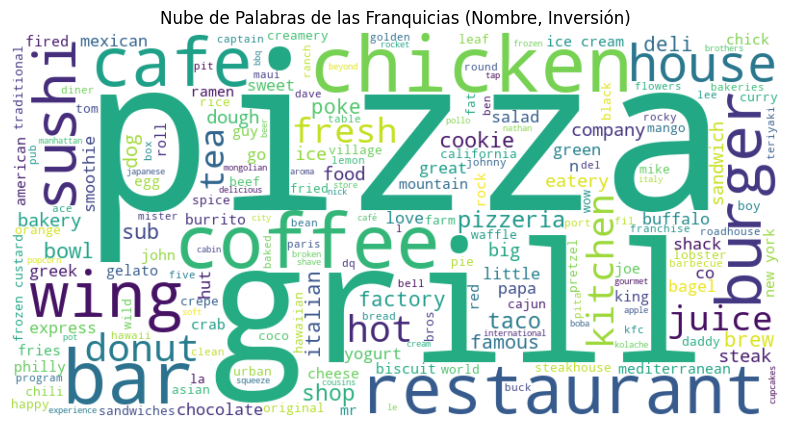

In [104]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# Combinar las columnas en un solo texto
texto = " ".join(df_fran["Nombre_Franquicia"] + " " +
                 df_fran["Min_Inversion"].astype(str) + " " +
                 df_fran["Max_Inversion"].astype(str))

# Descargar datos de NLTK (si no los has descargado previamente)
nltk.download('punkt')
nltk.download('stopwords')

# Tokenización y eliminación de palabras vacías (stopwords)
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Unir las palabras en una cadena de texto
texto_procesado = " ".join(words)

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de las Franquicias (Nombre, Inversión)")
plt.show()


La nube de palabras que se ha generado a partir de las columnas "Nombre_Franquicia", "Min_Inversion" y "Max_Inversion" del conjunto de datos de franquicias nos ofrece una visión valiosa de los aspectos más destacados en este contexto. En primer lugar, los nombres de las franquicias más relevantes sobresalen claramente, lo que proporciona una instantánea visual de las franquicias más mencionadas o prominentes en el conjunto de datos. Esto puede ser esencial para identificar cuáles son las franquicias que captan más atención o tienen una presencia significativa en el mercado..

Además, las palabras descriptivas como "restaurant" o "Grill" proporcionan información sobre la industria a la que pertenecen estas franquicias, lo que podría ser esencial para comprender mejor su contexto y alcance. En resumen, esta visualización de nube de palabras no solo resalta nombres clave y valores de inversión, sino que también ofrece pistas sobre la industria y el mercado en el que operan estas franquicias.

En conjunto, esta herramienta de visualización facilita la identificación de patrones, tendencias y áreas de interés en el conjunto de datos de franquicias, lo que puede respaldar la toma de decisiones estratégicas informadas, como la selección de franquicias para invertir o expandir, o la identificación de nichos de mercado en crecimiento.